In [15]:
import numpy as np
from gpu_xray_scattering import XS
from gpu_xray_scattering.Molecule import Molecule
import glob
import MDAnalysis as mda
from MDAnalysis.topology.guessers import guess_types

def readPDB(fname, sel='protein', psf=None):
    if psf is not None:
        U = mda.Universe(psf, fname)
    else:
        U = mda.Universe(fname)
    Usel = U.select_atoms(sel)
    Upos = Usel.positions
    try:
        print(Uele[:3])
        Uele = Usel.elements
    except:
        guessed_elements = guess_types(U.atoms.names)
        U.add_TopologyAttr('elements', guessed_elements)
        Uele = Usel.elements
        
    return Usel.positions, Usel.elements


In [2]:
scatter = XS.Scatter(use_oa=0)
scatter_oa = XS.Scatter(use_oa=1)
pro_coord, pro_ele = readPDB('1L2Y.pdb') # Or generate numpy arrays yourself
pro = Molecule(coordinates=pro_coord, elements=pro_ele)
S_calc = scatter.scatter(pro, timing=True)
S_calc_oa = scatter_oa.scatter(pro, timing=True)


Elapsed time = 390.934 ms
Elapsed time = 2.312 ms


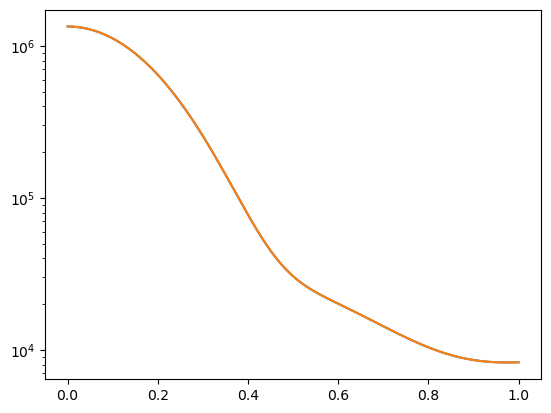

In [3]:
import matplotlib.pyplot as plt
plt.plot(scatter.q, S_calc)
plt.plot(scatter.q, S_calc_oa)
plt.yscale('log')

In [16]:

for prot in glob.glob('data/*.pdb'):
    
    pro_coord, pro_ele = readPDB(prot, sel='protein') # Or generate numpy arrays yourself
    print(f"Selection {prot} has {len(pro_ele)} atoms")
    if len(pro_ele) < 20000:
        pro = Molecule(coordinates=pro_coord, elements=pro_ele)
        print('Vanilla 1')
        S_calc = np.array(scatter.scatter(pro, timing=True))
    #     print(S_calc)
        print('Vanilla 2')
        S_calc2 = np.array(scatter.scatter(pro, timing=True))
#     print(S_calc2)
        rel_diff_max = np.max(np.abs((S_calc2 - S_calc) / S_calc))
        rel_diff_mean = np.mean(np.abs((S_calc2 - S_calc) / S_calc))
        ref_diff_max_idx = np.argmax(np.abs((S_calc2 - S_calc) / S_calc))
        print(f'Relative difference (within vanilla): mean {rel_diff_mean:.3e}, max {rel_diff_max:.3e} at idx {ref_diff_max_idx}: vanilla is {S_calc[ref_diff_max_idx]} and vanilla 2 is {S_calc2[ref_diff_max_idx]}')


    print('Orientational average 1')
    S_calc_oa = np.array(scatter_oa.scatter(pro, timing=True))
#     print(S_calc_oa)
    print('Orientational average 2')
    S_calc_oa2 = np.array(scatter_oa.scatter(pro, timing=True))
#     print(S_calc_oa2)
    #print(S_calc[:5], S_calc_oa[:5])
    rel_diff_max = np.max(np.abs((S_calc_oa2 - S_calc_oa) / S_calc))
    rel_diff_mean = np.mean(np.abs((S_calc_oa2 - S_calc_oa) / S_calc))
    ref_diff_max_idx = np.argmax(np.abs((S_calc_oa2 - S_calc_oa) / S_calc))
    print(f'Relative difference (within OA): mean {rel_diff_mean:.3e}, max {rel_diff_max:.3e} at idx {ref_diff_max_idx}: OA1 is {S_calc_oa[ref_diff_max_idx]} and OA2 is {S_calc_oa2[ref_diff_max_idx]}')

    if len(pro_ele) < 20000:
        rel_diff_max = np.max(np.abs((S_calc_oa - S_calc) / S_calc))
        rel_diff_mean = np.mean(np.abs((S_calc_oa - S_calc) / S_calc))
        ref_diff_max_idx = np.argmax(np.abs((S_calc_oa - S_calc) / S_calc))
        print(f'Relative difference (OA vs vanilla): mean {rel_diff_mean:.3e}, max {rel_diff_max:.3e} at idx {ref_diff_max_idx}: vanilla is {S_calc[ref_diff_max_idx]} and oa is {S_calc_oa[ref_diff_max_idx]}')
        print()


Selection data/1lst_wb_Cl.pdb has 3649 atoms
Vanilla 1
Elapsed time = 135.547 ms
Vanilla 2
Elapsed time = 102.195 ms
Relative difference (within vanilla): mean 0.000e+00, max 0.000e+00 at idx 0: vanilla is 193169600.0 and vanilla 2 is 193169600.0
Orientational average 1
Elapsed time = 38.515 ms
Orientational average 2
Elapsed time = 32.258 ms
Relative difference (within OA): mean 0.000e+00, max 0.000e+00 at idx 0: OA1 is 193167136.0 and OA2 is 193167136.0
Relative difference (OA vs vanilla): mean 6.479e-05, max 2.293e-04 at idx 144: vanilla is 118611.5234375 and oa is 118584.328125

Selection data/1ova.pdb has 11504 atoms
Vanilla 1
Elapsed time = 237.316 ms
Vanilla 2
Elapsed time = 211.069 ms
Relative difference (within vanilla): mean 0.000e+00, max 0.000e+00 at idx 0: vanilla is 5785816064.0 and vanilla 2 is 5785816064.0
Orientational average 1
Elapsed time = 21.765 ms
Orientational average 2
Elapsed time = 21.378 ms
Relative difference (within OA): mean 0.000e+00, max 0.000e+00 at id

In [17]:
pro_coord, pro_ele = readPDB('data/stmv.pdb', psf='data/stmv.psf', sel='protein') # Or generate numpy arrays yourself

In [18]:
pro = Molecule(coordinates=pro_coord, elements=pro_ele)

In [19]:
print(f"Selection stmv has {len(pro_ele)} atoms")

Selection stmv has 135960 atoms


In [22]:
S_calc_list = []
for i in range(1):
    S_calc = np.array(scatter.scatter(pro, timing=True))
    S_calc_list.append(S_calc)
S_calc_list = np.array(S_calc_list)

Elapsed time = 107781.727 ms


In [39]:
S_calc_list.std(axis=0)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [20]:
S_calc_oa_list = []
for i in range(10):
    S_calc_oa = np.array(scatter_oa.scatter(pro, timing=True))
    S_calc_oa_list.append(S_calc_oa)
S_calc_oa_list = np.array(S_calc_oa_list)

Elapsed time = 483.636 ms
Elapsed time = 232.244 ms
Elapsed time = 236.812 ms
Elapsed time = 228.611 ms
Elapsed time = 231.173 ms
Elapsed time = 227.470 ms
Elapsed time = 228.925 ms
Elapsed time = 228.466 ms
Elapsed time = 229.483 ms
Elapsed time = 224.092 ms


In [21]:
S_calc_oa_list.std(axis=0)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

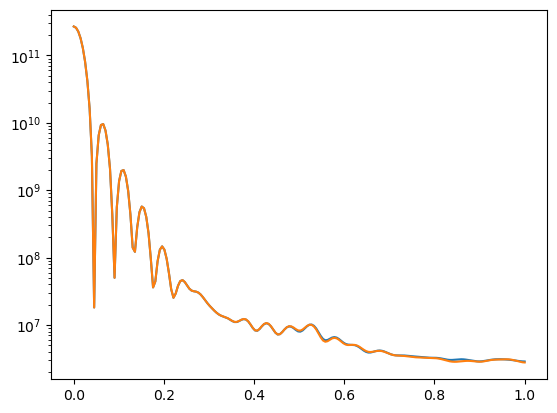

In [23]:
plt.plot(scatter.q, S_calc)
plt.plot(scatter.q, S_calc_oa)
plt.yscale('log')